# Creating the Model Grid

## Import Modules

In [1]:
import numpy as np
from cartopy import crs as ccrs
from matplotlib import pyplot as plt

## Project's Grid

The grid for Jonathan's model will be of the entire planet, with a grid spacing of 1/2 covering 720 columns and 360 rows.

In the data file for the model, the following parameters will be specified in the `PARM04` namelist within the `data` file:

```
usingSphericalPolarGrid=.TRUE.,
delX=720*0.50,
delY=360*0.50,
xgOrigin=-180,
ygOrigin=-90,
```

This grid can be recreated in Python as follows:

In [2]:
# Define the parameters that will be used in the data file.
DEL_X = 0.5
DEL_Y = 0.5
XG_ORIGIN = -180
YG_ORIGIN = -90
N_COLS = 720
N_ROWS = 360

# # Recreate the grids that will be used in the model.
XC = np.arange(XG_ORIGIN + DEL_X / 2, XG_ORIGIN + N_COLS * DEL_X + DEL_X / 2, DEL_X)
YC = np.arange(YG_ORIGIN + DEL_Y / 2, YG_ORIGIN + N_ROWS * DEL_Y + DEL_Y / 2, DEL_Y)
XC_MG, YC_MG = np.meshgrid(XC, YC)

## Visualizing the Grid

The grids above can be visualized as follows:

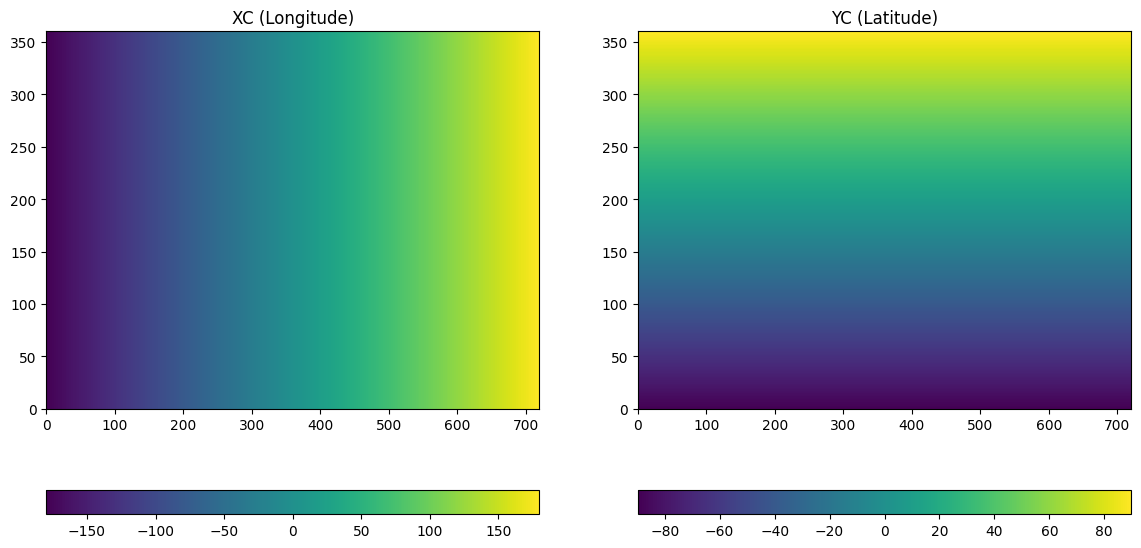

In [3]:
# make a plot of XC and YC
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
C = plt.pcolormesh(XC_MG)
plt.colorbar(C, orientation="horizontal")
plt.title("XC (Longitude)")

plt.subplot(1, 2, 2)
C = plt.pcolormesh(YC_MG)
plt.colorbar(C, orientation="horizontal")
plt.title("YC (Latitude)")

plt.show()

## Visualizing the Grid on a Map with Cartopy

To get a sense of where the model is located on the globe, cartopy can be be used to plot the domain on the globe:

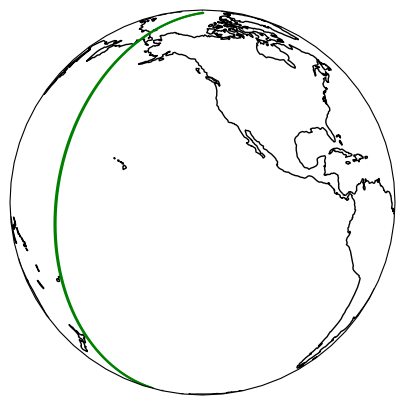

In [5]:
plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.Orthographic(-130, 10))
ax.plot(XC_MG[:, 0], YC_MG[:, 0], "g-", transform=ccrs.PlateCarree())
ax.plot(XC_MG[:, -1], YC_MG[:, -1], "g-", transform=ccrs.PlateCarree())
ax.plot(XC_MG[0, :], YC_MG[0, :], "g-", transform=ccrs.PlateCarree())
ax.plot(XC_MG[-1, :], YC_MG[-1, :], "g-", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.show()

## Visualizing the Grid Spacing

The model grid is defined in terms of units in longitude and latitude although it is useful to quantify the grid spacing in terms of more familiar units, such as meters. The following `great_circle_distance` function can be used to quantify this distance:

In [6]:
def great_circle_distance(lon_ref, lat_ref, lon, lat):
    earth_radius = 6371000
    lon_ref_radians = np.radians(lon_ref)
    lat_ref_radians = np.radians(lat_ref)
    lon_radians = np.radians(lon)
    lat_radians = np.radians(lat)
    lat_diff = lat_radians - lat_ref_radians
    lon_diff = lon_radians - lon_ref_radians

    d = (
        np.sin(lat_diff * 0.5) ** 2
        + np.cos(lat_ref_radians) * np.cos(lat_radians) * np.sin(lon_diff * 0.5) ** 2
    )
    h = 2 * earth_radius * np.arcsin(np.sqrt(d))
    return h

Then, loop through the points to generate inter-point distances in the horizontal (`dXC`) and vertical (`dYC`) directions:

In [7]:
D_XC = np.zeros((np.shape(XC_MG)[0], np.shape(XC_MG)[1] - 1))
for row in range(np.shape(XC_MG)[0]):
    for col in range(np.shape(XC_MG)[1] - 1):
        D_XC[row, col] = great_circle_distance(
            XC_MG[row, col], YC_MG[row, col], XC_MG[row, col + 1], YC_MG[row, col + 1]
        )

D_YC = np.zeros((np.shape(YC_MG)[0] - 1, np.shape(YC_MG)[1]))
for row in range(np.shape(XC_MG)[0] - 1):
    for col in range(np.shape(XC_MG)[1]):
        D_YC[row, col] = great_circle_distance(
            XC_MG[row, col], YC_MG[row, col], XC_MG[row + 1, col], YC_MG[row + 1, col]
        )

Finally, make a plot of the inter-point distances:

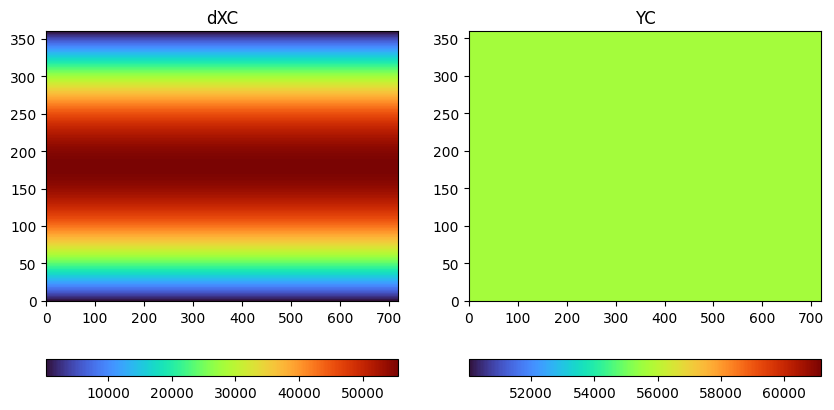

In [9]:
# make a plot of XC and YC
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
C = plt.pcolormesh(D_XC, cmap="turbo")
plt.colorbar(C, orientation="horizontal")
plt.title("dXC")

plt.subplot(1, 2, 2)
C = plt.pcolormesh(D_YC.round(3), cmap="turbo")
plt.colorbar(C, orientation="horizontal")
plt.title("YC")

plt.show()